<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20230529.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* Customer Analysis 
* Iterators

In [1]:
import pandas as pd
import numpy as np
import plotnine as gg
from plotnine import ggplot, aes
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date, time, timezone, timedelta
import os
import re
from functools import reduce
from collections import defaultdict
from scipy import stats
from scipy.stats import norm

# Customer Analysis

In [2]:
os.listdir()

['.config',
 'mall_customers.csv',
 'match_result_test.csv',
 'cookie_cats.csv',
 'sales_vs_discount.csv',
 'ab_experiment.csv',
 'ecommerce-data.csv',
 'scanner_data.csv',
 'groceries.csv',
 'test.csv',
 'KPMG_VI_New_raw_data_update_final.csv',
 'sample-sales-data.csv',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'sales.csv',
 'sales_data_with_stores.csv',
 'lead_conversion.csv',
 'app_wau.csv',
 '1_customers_dataset.csv',
 'online_retail_II.xlsx',
 'bz_data_analyis.csv',
 'WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv',
 '1_orders_dataset.csv',
 'online_retail.xlsx',
 'mock_sales_data.csv',
 '1_order_payments_dataset.csv',
 'WA_Fn-UseC_-Telco-Customer-Churn.csv',
 'sample_data']

In [5]:
df = pd.read_csv('groceries.csv')
df['sales_date'] = df['sales_date'].to_numpy().astype('datetime64[D]')
df['rev'] = df['price'] * df['sales_quantity']
df.head()

,product_code,product_description,product_group,sales_date,price,sales_quantity,unit,rev
0,1001,tomato,vegetable,2021-11-01,2.99,36,kg,107.64
1,1001,tomato,vegetable,2021-11-02,2.99,23,kg,68.77
2,1001,tomato,vegetable,2021-11-03,2.99,34,kg,101.66
3,1001,tomato,vegetable,2021-11-04,2.99,23,kg,68.77
4,1001,tomato,vegetable,2021-11-05,2.99,34,kg,101.66


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   product_code         300 non-null    int64         
 1   product_description  300 non-null    object        
 2   product_group        300 non-null    object        
 3   sales_date           300 non-null    datetime64[ns]
 4   price                284 non-null    float64       
 5   sales_quantity       300 non-null    int64         
 6   unit                 300 non-null    object        
 7   rev                  284 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 18.9+ KB


In [7]:
df.isnull().sum()

product_code            0
product_description     0
product_group           0
sales_date              0
price                  16
sales_quantity          0
unit                    0
rev                    16
dtype: int64

In [8]:
df[df['price'].isnull()]

,product_code,product_description,product_group,sales_date,price,sales_quantity,unit,rev
10,1001,tomato,vegetable,2021-11-11,NaN,20,kg,NaN
34,1002,cucumber,vegetable,2021-11-05,NaN,24,kg,NaN
37,1002,cucumber,vegetable,2021-11-08,NaN,38,kg,NaN
73,1003,onion,vegetable,2021-11-14,NaN,39,kg,NaN
74,1003,onion,vegetable,2021-11-15,NaN,25,kg,NaN
99,1101,plum,fruit,2021-11-10,NaN,36,kg,NaN
127,1102,orange,fruit,2021-11-08,NaN,28,kg,NaN
141,1102,orange,fruit,2021-11-22,NaN,38,kg,NaN
154,1103,apple,fruit,2021-11-05,NaN,28,kg,NaN
160,1103,apple,fruit,2021-11-11,NaN,21,kg,NaN


In [9]:
df[['product_code','price']].drop_duplicates()

,product_code,price
0,1001,2.99
10,1001,NaN
14,1001,3.49
23,1001,2.89
30,1002,4.29
34,1002,NaN
38,1002,4.49
48,1002,4.69
60,1003,2.29
69,1003,1.99


In [10]:
from sklearn.impute import KNNImputer

In [15]:
pd.get_dummies(df.select_dtypes(include = ['object']))

,product_description_apple,product_description_butter-0.25,product_description_cucumber,product_description_grape,product_description_milk-1.5,product_description_onion,product_description_orange,product_description_plum,product_description_tomato,product_description_yogurt-1,product_group_dairy,product_group_fruit,product_group_vegetable,unit_kg,unit_pcs
0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0
1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0
2,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0
3,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0
4,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
296,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
297,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
298,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1


In [34]:
df2 = pd.concat([df.select_dtypes(include = ['int','float']), pd.get_dummies(df.select_dtypes(include = ['object']))], axis = 1)
df2.head()

,product_code,price,sales_quantity,rev,product_description_apple,product_description_butter-0.25,product_description_cucumber,product_description_grape,product_description_milk-1.5,product_description_onion,product_description_orange,product_description_plum,product_description_tomato,product_description_yogurt-1,product_group_dairy,product_group_fruit,product_group_vegetable,unit_kg,unit_pcs
0,1001,2.99,36,107.64,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0
1,1001,2.99,23,68.77,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0
2,1001,2.99,34,101.66,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0
3,1001,2.99,23,68.77,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0
4,1001,2.99,34,101.66,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0


In [36]:
knn_imputer = KNNImputer(n_neighbors = 5)
knn_imputer.fit(df2)
df_imputed = knn_imputer.transform(df2)
df_imputed = pd.DataFrame(df_imputed, columns = df2.columns)
df_imputed = pd.concat([df[['sales_date']], df_imputed], axis = 1)
df_imputed.head()

,sales_date,product_code,price,sales_quantity,rev,product_description_apple,product_description_butter-0.25,product_description_cucumber,product_description_grape,product_description_milk-1.5,product_description_onion,product_description_orange,product_description_plum,product_description_tomato,product_description_yogurt-1,product_group_dairy,product_group_fruit,product_group_vegetable,unit_kg,unit_pcs
0,2021-11-01,1001.0,2.99,36.0,107.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,2021-11-02,1001.0,2.99,23.0,68.77,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,2021-11-03,1001.0,2.99,34.0,101.66,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,2021-11-04,1001.0,2.99,23.0,68.77,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,2021-11-05,1001.0,2.99,34.0,101.66,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [31]:
df.isnull().sum()

product_code            0
product_description     0
product_group           0
sales_date              0
price                  16
sales_quantity          0
unit                    0
rev                    16
dtype: int64

In [39]:
df_imputed = df_imputed[['sales_date','product_code','sales_quantity','rev','price']].rename(columns = {'rev':'rev2','price':'price2'})
df_imputed.head()

,sales_date,product_code,sales_quantity,rev2,price2
0,2021-11-01,1001.0,36.0,107.64,2.99
1,2021-11-02,1001.0,23.0,68.77,2.99
2,2021-11-03,1001.0,34.0,101.66,2.99
3,2021-11-04,1001.0,23.0,68.77,2.99
4,2021-11-05,1001.0,34.0,101.66,2.99


In [46]:
df_new = pd.merge(df, df_imputed, 'left',['sales_date','product_code','sales_quantity'])
df_new.head()

,product_code,product_description,product_group,sales_date,price,sales_quantity,unit,rev,rev2,price2
0,1001,tomato,vegetable,2021-11-01,2.99,36,kg,107.64,107.64,2.99
1,1001,tomato,vegetable,2021-11-02,2.99,23,kg,68.77,68.77,2.99
2,1001,tomato,vegetable,2021-11-03,2.99,34,kg,101.66,101.66,2.99
3,1001,tomato,vegetable,2021-11-04,2.99,23,kg,68.77,68.77,2.99
4,1001,tomato,vegetable,2021-11-05,2.99,34,kg,101.66,101.66,2.99


In [47]:
df_new[df_new['rev'].isnull()]

,product_code,product_description,product_group,sales_date,price,sales_quantity,unit,rev,rev2,price2
10,1001,tomato,vegetable,2021-11-11,NaN,20,kg,NaN,60.754,2.95
34,1002,cucumber,vegetable,2021-11-05,NaN,24,kg,NaN,110.538,4.57
37,1002,cucumber,vegetable,2021-11-08,NaN,38,kg,NaN,170.926,4.57
73,1003,onion,vegetable,2021-11-14,NaN,39,kg,NaN,80.578,2.11
74,1003,onion,vegetable,2021-11-15,NaN,25,kg,NaN,53.088,2.11
99,1101,plum,fruit,2021-11-10,NaN,36,kg,NaN,122.900,3.36
127,1102,orange,fruit,2021-11-08,NaN,28,kg,NaN,78.920,2.80
141,1102,orange,fruit,2021-11-22,NaN,38,kg,NaN,112.200,2.98
154,1103,apple,fruit,2021-11-05,NaN,28,kg,NaN,64.660,2.28
160,1103,apple,fruit,2021-11-11,NaN,21,kg,NaN,44.920,2.16


In [48]:
df['sales_date'].agg(['min','max'])

min   2021-11-01
max   2021-11-30
Name: sales_date, dtype: datetime64[ns]

In [53]:
df_new['weekday'] = df_new['sales_date'].dt.weekday

In [54]:
list_weekday = dict(zip(range(6), ['mon','tue','wed','thu','fri','sat','sun']))
df_new['weekday'] = df_new['weekday'].apply(lambda x : list_weekday.get(x,x))
df_new.head()

,product_code,product_description,product_group,sales_date,price,sales_quantity,unit,rev,rev2,price2,weekday
0,1001,tomato,vegetable,2021-11-01,2.99,36,kg,107.64,107.64,2.99,mon
1,1001,tomato,vegetable,2021-11-02,2.99,23,kg,68.77,68.77,2.99,tue
2,1001,tomato,vegetable,2021-11-03,2.99,34,kg,101.66,101.66,2.99,wed
3,1001,tomato,vegetable,2021-11-04,2.99,23,kg,68.77,68.77,2.99,thu
4,1001,tomato,vegetable,2021-11-05,2.99,34,kg,101.66,101.66,2.99,fri


In [57]:
cnt_rev = df_new.groupby(['sales_date', 'product_group', 'weekday'])['rev'].sum().reset_index(name = 'rev')
cnt_rev.head()

,sales_date,product_group,weekday,rev
0,2021-11-01,dairy,mon,630.00
1,2021-11-01,fruit,mon,404.20
2,2021-11-01,vegetable,mon,268.43
3,2021-11-02,dairy,tue,883.10
4,2021-11-02,fruit,tue,368.20


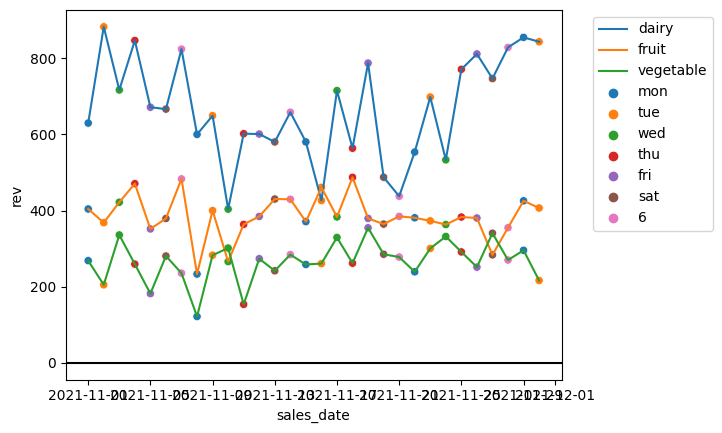

In [63]:
sns.lineplot(data = cnt_rev, x = 'sales_date', y = 'rev', hue = 'product_group')
sns.scatterplot(data = cnt_rev, x = 'sales_date', y = 'rev', hue = 'weekday')
plt.axhline(y = 0, color = 'black')
plt.legend(bbox_to_anchor = [1.05,1])
plt.show()

In [73]:
cnt_q = df_new.groupby(['product_description','weekday'])['rev'].quantile([.25,.5,.75,.95]).reset_index(name = 'rev').rename(columns = {'level_2':'q'})
cnt_q.head()

,product_description,weekday,q,rev
0,apple,6,0.25,72.625
1,apple,6,0.50,75.550
2,apple,6,0.75,78.100
3,apple,6,0.95,80.740
4,apple,fri,0.25,52.800


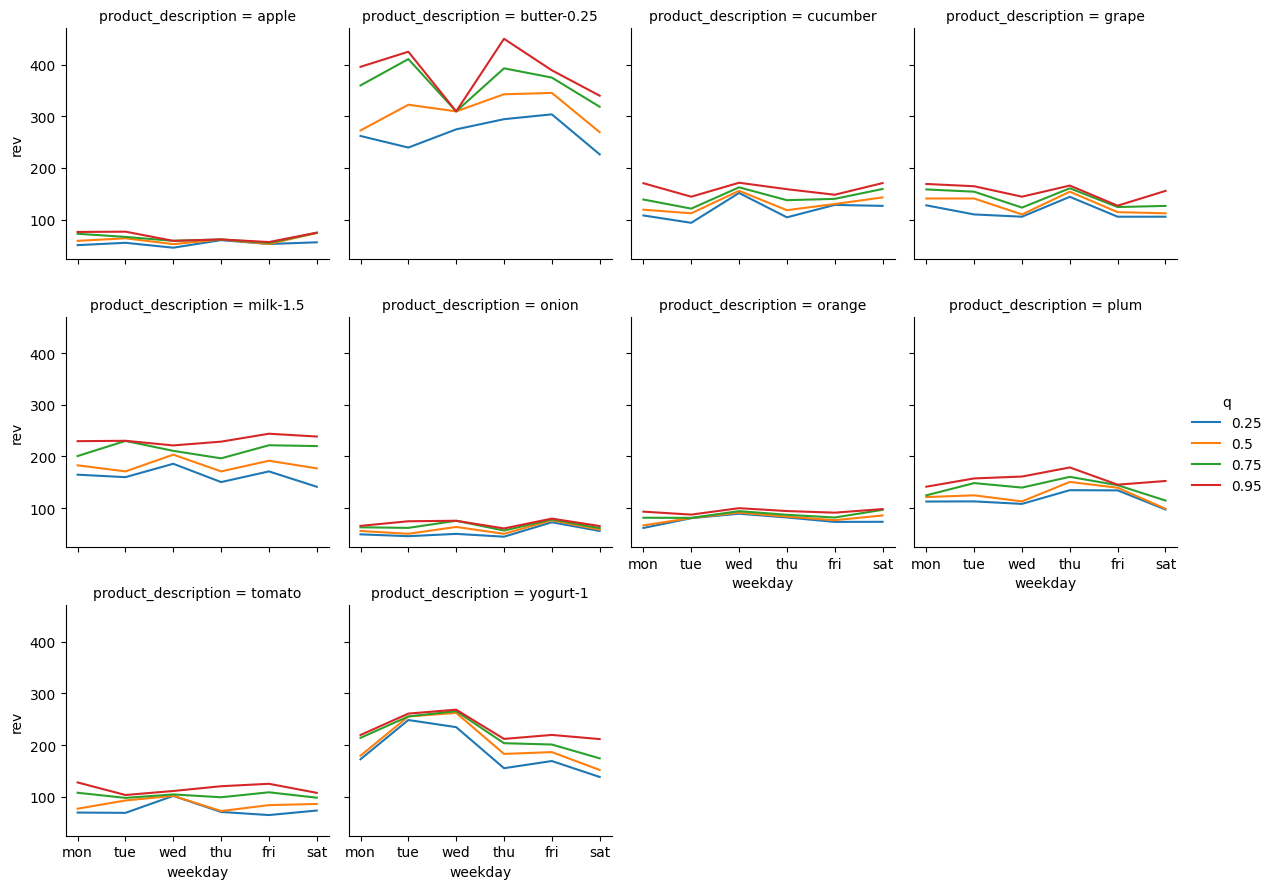

In [75]:
cnt_q['weekday'] = pd.Categorical(cnt_q['weekday'], categories = list_weekday.values())
g = sns.FacetGrid(cnt_q, col = 'product_description', hue = 'q', col_wrap = 4)
g.map(sns.lineplot, 'weekday', 'rev')
g.add_legend()
plt.show()

# Iterators

In [76]:
users = [{'mail': 'gregorythomas@gmail.com', 'name': 'Brett Holland', 'sex': 'M', 'age': 73},
 {'mail': 'hintoncynthia@hotmail.com', 'name': 'Madison Martinez', 'sex': 'F', 'age': 29},
 {'mail': 'wwagner@gmail.com', 'name': 'Michael Jenkins', 'sex': 'M', 'age': 51},
 {'mail': 'daniel79@gmail.com', 'name': 'Karen Rodriguez', 'sex': 'F', 'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]
users

[{'mail': 'gregorythomas@gmail.com',
  'name': 'Brett Holland',
  'sex': 'M',
  'age': 73},
 {'mail': 'hintoncynthia@hotmail.com',
  'name': 'Madison Martinez',
  'sex': 'F',
  'age': 29},
 {'mail': 'wwagner@gmail.com',
  'name': 'Michael Jenkins',
  'sex': 'M',
  'age': 51},
 {'mail': 'daniel79@gmail.com',
  'name': 'Karen Rodriguez',
  'sex': 'F',
  'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]

In [77]:
{k : eval(f'reduce(lambda acc, cur : acc + [cur["{k}"]],users, [])') for k in users[0].keys()}

{'mail': ['gregorythomas@gmail.com',
  'hintoncynthia@hotmail.com',
  'wwagner@gmail.com',
  'daniel79@gmail.com',
  'ujackson@gmail.com'],
 'name': ['Brett Holland',
  'Madison Martinez',
  'Michael Jenkins',
  'Karen Rodriguez',
  'Amber Rhodes'],
 'sex': ['M', 'F', 'M', 'F', 'F'],
 'age': [73, 29, 51, 32, 42]}

In [78]:
{k : [user[k] for user in users] for k in users[0].keys()}

{'mail': ['gregorythomas@gmail.com',
  'hintoncynthia@hotmail.com',
  'wwagner@gmail.com',
  'daniel79@gmail.com',
  'ujackson@gmail.com'],
 'name': ['Brett Holland',
  'Madison Martinez',
  'Michael Jenkins',
  'Karen Rodriguez',
  'Amber Rhodes'],
 'sex': ['M', 'F', 'M', 'F', 'F'],
 'age': [73, 29, 51, 32, 42]}